# Exercise 1: Sensitivity Analyses

## 1. Write out the optimization problem. Make sure to detail the decision variables, the objective function and the constraints.

### Decision Variables
\begin{equation}
x_{ij}\\
i=\{1,2,3,4\}, j=\{1,2\}
\end{equation}

More specifically, 

Let $i=\{1,2,3,4\}$ be in the index for the advertisers such that
* $i=1$ is GEICO
* $i=2$ is Delta
* $i=3$ is T-Mobile
* $i=4$ is Capital One

Let $j=\{1,2\}$ be the index for the category, such that
* $j=1$ is Sports categorty
* $j=2$ is National category

So $x_{11}$ is the number of impressions for Geico in Sports and $x_{12}$ is the number of impressions for GEICO int he National category.


### Objective Function

The objective of the platform, i.e., Washington Post, is to maximize advertising revenues. These revenues are driven by the cost per click charged to the advertisers, i.e., $\pi=\$2.4$ and the click-through rates (CTR).

Let $\kappa_{ij}$ be the CTR of advertiser $i$ in category $j$. For instance, the CTR of T-Mobile in the sports category is $\kappa_{31}=1.0\%$, whereas its CTR in the National category is $\kappa_{32}=3.0\%$.

The objective function is thus:
\begin{equation}
\text{Maximize} \quad 2.4\times \sum_{i=1}^4\sum_{j=1}^{2}  \kappa_{ij}\times x_{ij}
\end{equation}

\begin{equation}
\kappa^T=
\begin{bmatrix} 0.025 & 0.008 \\ 0.02 & 0.01 \\ 0.01 & 0.03 \\ 0.015 & 0.02 \end{bmatrix}
\end{equation}

\begin{equation}
x=
\begin{bmatrix} x_{11} & x_{21} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ x_{41} & x_{42} \end{bmatrix}
\end{equation}


### Constraints
The first table provides the following constraints

\begin{align}
x_{11}&\geq 2,000,000\\
x_{12}&\geq 1,000,000\\
x_{22}&\geq 1,000,000\\
x_{21}+x_{22}&\geq 2,000,000\\
x_{31}&\geq 1,000,000\\
x_{32}&\geq 1,000,000\\
x_{31}+x_{32}&\geq 3,000,000\\
x_{41}+x_{42}&\geq 2,000,000\\
\end{align}

"Assume that the Sports section gets six million views per day and the National section
get five million views per day"
This statement gives two constraints:
\begin{align}
\sum_{i=1}^{4}x_{i1}&\leq 6,000,000\\
\sum_{i=1}^{4}x_{i2}&\leq 5,000,000\\
\end{align}

Non-negativity constraints are
\begin{equation}
x_{ij}\geq 0
\end{equation}


## 2. What is the optimal solution? Give the values of the decision variables and the optimal objective function value.

In [1]:
# !pip install cvxpy
import numpy 
import math
import cvxpy as cvx
from numpy import * 
from cvxpy import *
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Click Through Rates
kappa = matrix([[2.5,2.0,1.0,1.5],[0.8,1.0,3.0,2.0]])
kappa1 = kappa[0]
kappa2 = kappa[1]

# Decision Variables
x1 = cvx.Variable((4,1),integer = True)
x2 = cvx.Variable((4,1),integer = True)

# Objective Function
Z1 = sum(kappa1*x1)*2.4/100 # Revenue for Sports
Z2 = sum(kappa2*x2)*2.4/100 # Revenue for National
objective = cvx.Maximize((Z1 + Z2))

# Constraints
c1=(sum(x1))<=6*1000000 # Capacity on Sports
c2=(sum(x2))<=5*1000000 # Capacity on Sports
c3=x1[0]>=2*1000000 # Geico must have at least 2m in Sports
c4=x2[0]>=1*1000000 # Geico must have at least 1m in National
c5=x2[1]>=1*1000000 # Delta must have at least 1m in National
c6=x1[1]+x2[1]==2*1000000 # Delta's total number of impressions must be equal to 2m in total
c7=x1[2]>=1*1000000 # T-mobile must have at least 1m impression in Sports
c8=x2[2]>=1*1000000 # T-mobile must have at least 1m impression in National
c9=x1[2]+x2[2]==3*1000000 # T-mobile's total number of impressions must be equal 3m in total
c10=x1[3]+x2[3]==2*1000000 # Capital One's total number of impressions must be equal 2m in total
c=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,x1>=0,x2>=0] # Non-negativity constraints

# Form and solve the problem
prob = cvx.Problem(objective, c)
result = prob.solve()

# Create a summary table for decision variables
summary_df = pd.DataFrame(columns = ["Sports", "National"], index = ["GEICO", "Delta", "T-mobile", "Capital One"])

for i in range(4):
  summary_df["Sports"][i] = str(int(x1.value[i][0]))
  summary_df["National"][i] = str(int(x2.value[i][0]))

# Print out the results
print('The value of the decision variables are')
print(summary_df)
print('The optimal objective function value (revenue) is ')
print(prob.value)

The value of the decision variables are
              Sports National
GEICO        3000000  1000000
Delta        1000000  1000000
T-mobile     1000000  2000000
Capital One  1000000  1000000
The optimal objective function value (revenue) is 
523200.0


## 3. Conduct sensitivity analyses of the optimal solution to different click-through rates as given in the table below. Do one cell at time if you want, e.g., sensitivity of the solution to different CTRs for GEICO in the Sports section, then in the National section; then do the same for each advertiser.

In [0]:
def opt_solution(sg=2.5, sd=2.0, st=1.0, sc=1.5, ng=0.8, nd=1.0, nt=3.0, nc=2.0):
  # Click Through Rates
  kappa = matrix([[sg,sd,st,sc],[ng,nd,nt,nc]])
  kappa1 = kappa[0]
  kappa2 = kappa[1]

  # Decision Variables
  x1 = cvx.Variable((4,1),integer = True)
  x2 = cvx.Variable((4,1),integer = True)

  # Objective Function
  Z1 = sum(kappa1*x1)*2.4/100 # Revenue for Sports
  Z2 = sum(kappa2*x2)*2.4/100 # Revenue for National
  objective = cvx.Maximize((Z1 + Z2))

  # Constraints
  c1=(sum(x1))<=6*1000000 # Capacity on Sports
  c2=(sum(x2))<=5*1000000 # Capacity on Sports
  c3=x1[0]>=2*1000000 # Geico must have at least 2m in Sports
  c4=x2[0]>=1*1000000 # Geico must have at least 1m in National
  c5=x2[1]>=1*1000000 # Delta must have at least 1m in National
  c6=x1[1]+x2[1]==2*1000000 # Delta's total number of impressions must be equal to 2m in total
  c7=x1[2]>=1*1000000 # T-mobile must have at least 1m impression in Sports
  c8=x2[2]>=1*1000000 # T-mobile must have at least 1m impression in National
  c9=x1[2]+x2[2]==3*1000000 # T-mobile's total number of impressions must be equal 3m in total
  c10=x1[3]+x2[3]==2*1000000 # Capital One's total number of impressions must be equal 2m in total
  c=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,x1>=0,x2>=0] # Non-negativity constraints

  # Form and solve the problem
  prob = cvx.Problem(objective, c)
  result = prob.solve()

  # Create a summary table for decision variables
  summary_df = pd.DataFrame(columns = ["Sports", "National"], index = ["GEICO", "Delta", "T-mobile", "Capital One"])
  for i in range(4):
    summary_df["Sports"][i] = str(int(x1.value[i][0]))
    summary_df["National"][i] = str(int(x2.value[i][0]))

  return prob.value

In [0]:
sensitivity = pd.DataFrame(columns={'Advertiser-Section','CTR','Optimal_Revenue'})
sensitivity = sensitivity.rename(columns = {'CTR': 'CTR(%)'})

In [0]:
## Geico-Sports
for ctr in range(20,31,1):
  sensitivity = sensitivity.append({'CTR(%)': ctr/10, 'Optimal_Revenue': opt_solution(sg=ctr/10), 'Advertiser-Section': 'Geico-Sports'}, ignore_index=True)

## Geico-National
for ctr in range(1,12,1):
  sensitivity = sensitivity.append({'CTR(%)': ctr/10, 'Optimal_Revenue': opt_solution(ng=ctr/10), 'Advertiser-Section': 'Geico-National'}, ignore_index=True)

## Delta-Sports
for ctr in range(15,26,1):
  sensitivity = sensitivity.append({'CTR(%)': ctr/10, 'Optimal_Revenue': opt_solution(sd=ctr/10), 'Advertiser-Section': 'Delta-Sports'}, ignore_index=True)

## Delta-National
for ctr in range(5,26,1):
  sensitivity = sensitivity.append({'CTR(%)': ctr/10, 'Optimal_Revenue': opt_solution(nd=ctr/10), 'Advertiser-Section': 'Delta-National'}, ignore_index=True)

## T-mobile-Sports
for ctr in range(5,16,1):
  sensitivity = sensitivity.append({'CTR(%)': ctr/10, 'Optimal_Revenue': opt_solution(st=ctr/10), 'Advertiser-Section': 'T-mobile-Sports'}, ignore_index=True)

## T-mobile-National
for ctr in range(25,36,1):
  sensitivity = sensitivity.append({'CTR(%)': ctr/10, 'Optimal_Revenue': opt_solution(nt=ctr/10), 'Advertiser-Section': 'T-mobile-National'}, ignore_index=True)

## Capital One-Sports
for ctr in range(15,21,1):
  sensitivity = sensitivity.append({'CTR(%)': ctr/10, 'Optimal_Revenue': opt_solution(sc=ctr/10), 'Advertiser-Section': 'Capital One-Sports'}, ignore_index=True)

## Capital One-National
for ctr in range(15,26,1):
  sensitivity = sensitivity.append({'CTR(%)': ctr/10, 'Optimal_Revenue': opt_solution(nc=ctr/10), 'Advertiser-Section': 'Capital One-National'}, ignore_index=True)

In [6]:
## Calculate the % increase of optimal revenue per 0.1% increase of CTR
sensitivity['Margin(%)'] = None

for row in range(len(sensitivity)):
  if row > 0 and sensitivity['Advertiser-Section'][row] == sensitivity['Advertiser-Section'][row-1]:
    sensitivity['Margin(%)'][row] = 100*(sensitivity['Optimal_Revenue'][row]/sensitivity['Optimal_Revenue'][row-1]-1)
  else:
    continue

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
## Round the Optimal_revenue
sensitivity['Optimal_Revenue'] = round(sensitivity['Optimal_Revenue'], 0)

# sensitivity.to_csv('sensitivity.csv') ## to see the whole table
sensitivity

,Advertiser-Section,CTR(%),Optimal_Revenue,Margin(%)
0,Geico-Sports,2.0,487200.0,None
1,Geico-Sports,2.1,494400.0,1.47783
2,Geico-Sports,2.2,501600.0,1.45631
3,Geico-Sports,2.3,508800.0,1.43541
4,Geico-Sports,2.4,516000.0,1.41509
...,...,...,...,...
88,Capital One-National,2.1,525600.0,0.458716
89,Capital One-National,2.2,528000.0,0.456621
90,Capital One-National,2.3,530400.0,0.454545
91,Capital One-National,2.4,532800.0,0.452489


## 4. Write no more than one paragraph (no more than 300 words) to describe the results of your analyses. Tables or graphs can be provided as supplemental material.

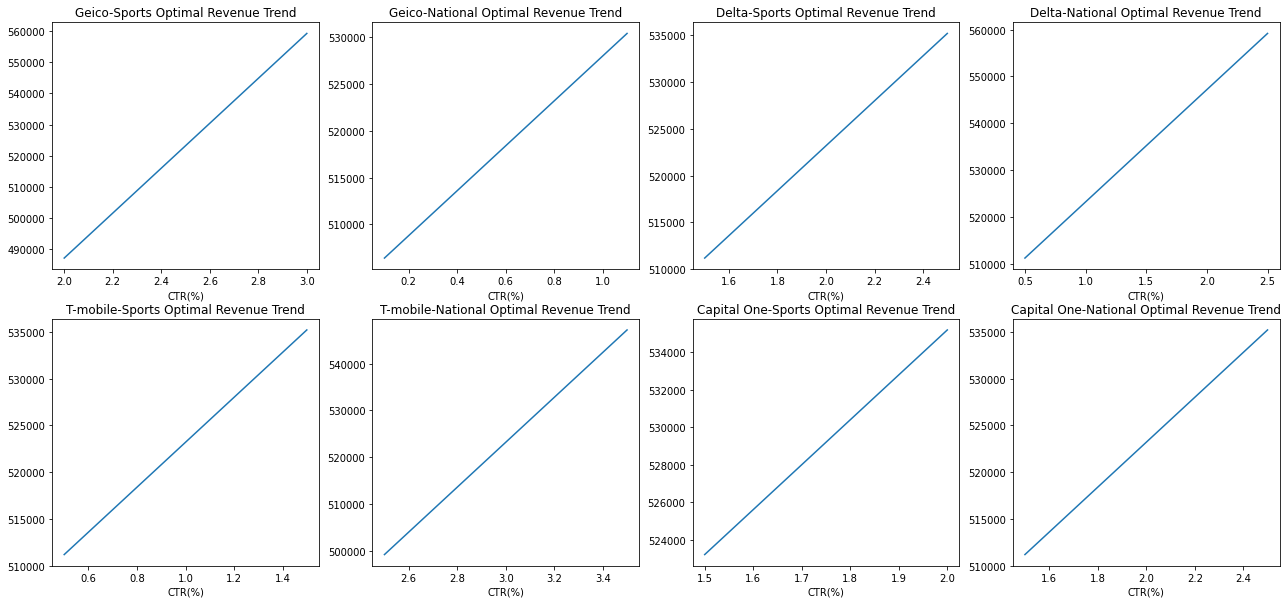

In [8]:
## Trend of optimal revenue for each Advertiser-Section
fig, ax = plt.subplots(figsize = (22,10))

i = 0
for adsec in sensitivity['Advertiser-Section'].unique():
  trend = sensitivity[sensitivity['Advertiser-Section'] == adsec]
  plt.subplot(2,4,i+1)
  plt.plot(trend['CTR(%)'], trend['Optimal_Revenue'])
  plt.title(str(adsec)+' Optimal Revenue Trend')
  plt.xlabel("CTR(%)")
  i = i + 1

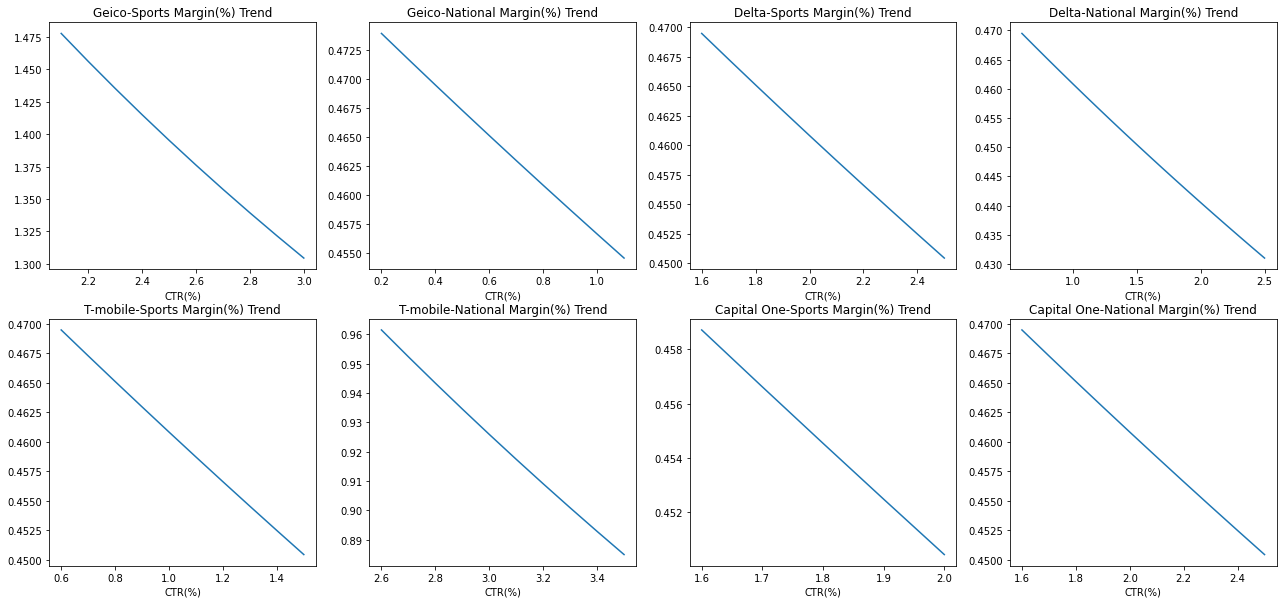

In [9]:
## Trend of Margin(%) for each Advertiser-Section
fig, ax = plt.subplots(figsize = (22,10))

i = 0
for adsec in sensitivity['Advertiser-Section'].unique():
  trend = sensitivity[sensitivity['Advertiser-Section'] == adsec]
  plt.subplot(2,4,i+1)
  plt.plot(trend['CTR(%)'], trend['Margin(%)'])
  plt.title(str(adsec)+' Margin(%) Trend')
  plt.xlabel("CTR(%)")
  i = i + 1

Generally the optimal revenue increases with the increase of the CTR of each company in each section. But the [% increase of optimal revenue per 0.1% increase of CTR] decreases, in other words, the marginal gain (increase of optimal revenue) of increasing CTR by 0.1% decreases for each company-section. In addition, among the Margin(%)s of all company-sections, Geico-Sports has the largest value, followed by T-mobile-National, while the others are basically the same. So, to increase revenue, increasing the CTR of Geico-Sports could be considered first, followed by T-mobile-National.

# Exercise 2: Operations Excellence

## 1. Write the optimization models for each plant, i.e., make sure to detail the decision variables, the objective function and the constraints.

### Plant A
#### 1. Decision Variables
\begin{equation}
x_{1}: \text{Number of standard products made in Plant A}\\ 
x_{2}: \text{Number of deluxe products made in Plant A}\\
\end{equation}
#### 2. Objective Function
\begin{equation}
\text{Maximize} \quad 10x_{1}+15x_{2}
\end{equation}
#### 3. Constraints
Capacity Limits for each process  
Grinding: \begin{equation}4x_{1}+2x_{2}\leq80\end{equation}  
Polishing: \begin{equation}2x_{1}+5x_{2}\leq60\end{equation}  
Raw material Limit: \begin{equation}4x_{1}+4x_{2}\leq75\end{equation}  
Non-negativity constriants: \begin{equation}x_{1},x_{2}\geq0\end{equation}  
### Plant B
#### 1. Decision Variables
\begin{equation}
y_{1}: \text{Number of standard products made in Plant B}\\ 
y_{2}: \text{Number of deluxe products made in Plant B}\\
\end{equation}
#### 2. Objective Function
\begin{equation}
\text{Maximize} \quad 10y_{1}+15y_{2}
\end{equation}
#### 3. Constraints
Capacity Limits for each process  
Grinding: \begin{equation}5y_{1}+3y_{2}\leq60\end{equation}
Polishing: \begin{equation}5y_{1}+6y_{2}\leq75\end{equation}  
Raw material Limit: \begin{equation}4y_{1}+4y_{2}\leq45\end{equation}  
Non-negativity constriants: \begin{equation}y_{1},y_{2}\geq0\end{equation} 

## 2. Provide the optimal solutions and profit levels for each factory. Give the values of the decision variables and the optimal objective function value.

### Plant A

In [10]:
# Decision Variables
x1 = cvx.Variable(1, integer = True)
x2 = cvx.Variable(1, integer = True)

# Objective Function
objective = cvx.Maximize(10*x1+15*x2)

# Constraints
c1=4*x1+2*x2<=80 # Grinding capacity limit
c2=2*x1+5*x2<=60 # Polishing capacity limit
c3=4*x1+4*x2<=75 # Raw material limit
c=[c1,c2,c3,x1>=0,x2>=0] # Non-negativity constraints

# Form and solve the problem
prob = cvx.Problem(objective, c)
result = prob.solve()

# Print out the results
print('The optimal production of the standard products in Plant A is')
print(x1.value[0])
print('The optimal production of the deluxe products in Plant A is')
print(x2.value[0])
print('The optimal objective function value (profit) is ')
print(prob.value)

The optimal production of the standard products in Plant A is
10.0
The optimal production of the deluxe products in Plant A is
8.0
The optimal objective function value (profit) is 
220.0


### Plant B

In [11]:
# Decision Variables
y1 = cvx.Variable(1, integer = True)
y2 = cvx.Variable(1, integer = True)

# Objective Function
objective = cvx.Maximize(10*y1+15*y2)

# Constraints
c1=5*y1+3*y2<=60 # Grinding capacity limit
c2=5*y1+6*y2<=75 # Polishing capacity limit
c3=4*y1+4*y2<=45 # Raw material limit
c=[c1,c2,c3,y1>=0,y2>=0] # Non-negativity constraints

# Form and solve the problem
prob = cvx.Problem(objective, c)
result = prob.solve()

# Print out the results
print('The optimal production of the standard products in Plant B is')
print(y1.value[0])
print('The optimal production of the deluxe products in Plant B is')
print(y2.value[0])
print('The optimal objective function value (profit) is ')
print(prob.value)

The optimal production of the standard products in Plant B is
0.0
The optimal production of the deluxe products in Plant B is
11.0
The optimal objective function value (profit) is 
165.0


## 3. Now, write the optimization model for the joint optimization of Plant A and B, and provide the optimal solution and profit levels.

### Optimization Model
#### 1. Decision Variables

| Plant | Standard | Deluxe      
| :---:|:---: | :---:
| Plant A | $x_{11}$ | $x_{12}$
| Plant B | $x_{21}$ | $x_{22}$

\begin{equation}
x_{11}: \text{Number of standard products made in Plant A}  \\
x_{12}: \text{Number of deluxe products made in Plant A}  \\
x_{21}: \text{Number of standard products made in Plant B}  \\
x_{22}: \text{Number of deluxe products made in Plant B}
\end{equation}
#### 2. Objective Function
\begin{equation}
\text{Maximize} \quad 10(x_{11}+x_{21})+15(x_{12}+x_{22})
\end{equation}
#### 3. Constraints
Capacity Limits for each process  
Grinding: 
\begin{equation}
4x_{11}+2x_{12}\leq80\\
5x_{21}+3x_{22}\leq60
\end{equation}  
Polishing: 
\begin{equation}
2x_{11}+5x_{12}\leq60\\
5x_{21}+6x_{22}\leq75
\end{equation}  
Raw material Limit: 
\begin{equation}
4x_{11}+4x_{12}+4x_{21}+4x_{22}\leq120
\end{equation}  
Non-negativity constriants: 
\begin{equation}
x_{11},x_{12},x_{21},x_{22}\geq0
\end{equation} 


### Optimal Solution and Profit Level

In [12]:
# Decision Variables
x11 = cvx.Variable(1, integer = True)
x12 = cvx.Variable(1, integer = True)
x21 = cvx.Variable(1, integer = True)
x22 = cvx.Variable(1, integer = True)

# Objective Function
objective = cvx.Maximize(10*x11+10*x21+15*x12+15*x22)

# Constraints
c1=4*x11+2*x12<=80 # Grinding capacity limit for Plant A
c2=5*x21+3*x22<=60 # Grinding capacity limit for Plant B
c3=2*x11+5*x12<=60 # Polishing capacity limit for Plant A
c4=5*x21+6*x22<=75 # Polishing capacity limit for Plant B
c5=4*x11+4*x12+4*x21+4*x22<=120 # Raw material limit
c=[c1,c2,c3,c4,c5,x11>=0,x12>=0,x21>=0,x22>=0] # Non-negativity constraints

# Form and solve the problem
prob = cvx.Problem(objective, c)
result = prob.solve()

# Create a summary table
summary_df = pd.DataFrame(columns = ['Standard', 'Deluxe'], index = ['Plant A', 'Plant B'])
summary_df.iloc[0,0] = x11.value[0]
summary_df.iloc[0,1] = x12.value[0]
summary_df.iloc[1,0] = x21.value[0]
summary_df.iloc[1,1] = x22.value[0]

# Print out the results
print('The optimal values for the decision variables are')
print(summary_df)
print('The optimal objective function value (profit) is ')
print(prob.value)

The optimal values for the decision variables are
        Standard Deluxe
Plant A       10      8
Plant B        0     12
The optimal objective function value (profit) is 
400.0


## 4. Please comment on the results? How do they compare to the results obtained in Question 2.

The optimal values for Plant A remain the same, while the optimal values for Plant B's production allocation on the deluxe product increase by one unit, and the overall profit increase from 385 (220+165) to 400.

## 5. In one paragraph (no more than 300 words), detail the recommendations you would provide to the CEO of the company to improve the firm’s operations?

We should decide on the optimal allocation of production by the joint optimization of Plant A and B rather than separately, because the overall profit will be maximized and the resources will be fully utilized as possible.  
According the result of the optimization model, we should make 10 standard products and 8 deluxe products in Plant A, and 0 standard product and 12 deluxe products in Plant B per week to reach the maximum total profit of $400.

# Exercise 3: Hotel La Quinta Motor Inns (LQM)
\begin{equation}
\text{Profitability}=39.05-(5.41\times\text{State Population per Inn})+(5.86\times\text{Price of the Inn})-(3.09\times\text{Square Root of the Median Income in the area})+(1.75\times\text{College Student in the Area})
\end{equation}


## 1. According to the regression equation given above, which variable positively affect Profitability? Which variable negatively affect Profitability? Does this intuitively make sense? Why?

'Price of the Inn' and 'College Student in the Area' positively affect profitability, while 'State Population per Inn' and 'Square Root of the Median Income in the Area' negatively affect profitability.  
This intuitively makes sense, because higher price generally means better decoration and equipments which will make the inn more popular, college students increase the demand of rooms, while high state population per inn means the number of inns is small and people are not that willing to go to inns, and higher median income means people are richer and will probably go to hotels rather than cheap inns.

## 2. Using this regression equation, LQM created a spreadsheet model to predict profitability. LQM collected data for several locations in California, which is provided in the excel spreadsheet on Canvas “LQM”. Using this spreadsheet, compute the profitability for each hotel. Which one has the highest profitability? Which one has the lowest profitability?

In [0]:
# Read the file and rename the columns
lqm = pd.read_excel('https://raw.githubusercontent.com/haohao13/optimization/master/SelectingHotels%20-%20Part%20A%20of%20Homework.xlsx', skiprows = 2)
lqm = lqm.rename(columns = {'Price (normalized)': 'price_norm', 'Square Root of Median Income (normalized)': 'sqrt_median_income',
                            'College Students in Area (normalized)': 'collegestudents', 'State Population Per Inn (normalized)': 'statepopperinn'})

In [14]:
# Calculate the profitability for each hotel
lqm['profitability']=39.05-5.41*lqm['statepopperinn']+5.86*lqm['price_norm']-3.09*lqm['sqrt_median_income']+1.75*lqm['collegestudents']

# Sort the hotels by descending order of the profitability of each hotel
lqm = lqm.sort_values('profitability', ascending=0)
lqm = lqm.reset_index().drop('index', axis = 1)

lqm

,Hotel,Location,Price,price_norm,sqrt_median_income,collegestudents,statepopperinn,profitability
0,2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279,53.379192
1,6,"Long Beach, California",8950000,1.402123,0.657845,0.483711,-0.557278,49.095069
2,1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987,44.242369
3,3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279,43.021179
4,4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279,42.606858
5,14,"South Lake Tahoe, California",3750000,-0.068503,-0.791006,-0.594905,-0.426851,42.360966
6,12,"South Lake Tahoe, California",2500000,-0.422019,-0.791006,-0.594905,-0.426851,40.289363
7,13,"South Lake Tahoe, California",1975000,-0.570495,-0.791006,-0.594905,-0.426851,39.419290
8,10,"South Lake Tahoe, California",1650000,-0.662409,-0.791006,-0.594905,-0.426851,38.880673
9,15,"South Lake Tahoe, California",1475000,-0.711902,-0.791006,-0.594905,-0.426851,38.590649


Hotel 2 has the highest profitability, while hotel 8 has the lowest profitability.

## 3. LQM has a budget of $10 million to spend on hotels. Suppose we used a “greedy” approach where we selected the most profitable hotels until we ran out of budget. So we would start by the most profitable, and then if we had enough budget left, we would buy the hotel we predict to be the second most profitable, and so on.

### a. Describe what we would do with this approach, i.e., which hotels would we purchase?

In [15]:
# Calculate the cumulative price
lqm['cum_price'] = None

for row in range(len(lqm)):
  if row == 0:
    lqm['cum_price'][row] = lqm['Price'][row]
  else:
    lqm['cum_price'][row] = lqm['cum_price'][row-1] + lqm['Price'][row]

# Make purchase decisions on the cumulative price (<=10m)
lqm['purchase'] = lqm['cum_price'].apply(lambda x: 'yes' if x <= 10000000 else 'no')

# Calculate the cost-efficient level of each hotel
lqm['cost-efficient'] = round((lqm['profitability']/lqm['Price'])*100000,2)

lqm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Hotel,Location,Price,price_norm,sqrt_median_income,collegestudents,statepopperinn,profitability,cum_price,purchase,cost-efficient
0,2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279,53.379192,10000000,yes,0.53
1,6,"Long Beach, California",8950000,1.402123,0.657845,0.483711,-0.557278,49.095069,18950000,no,0.55
2,1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987,44.242369,21875000,no,1.51
3,3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279,43.021179,25625000,no,1.15
4,4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279,42.606858,29125000,no,1.22
5,14,"South Lake Tahoe, California",3750000,-0.068503,-0.791006,-0.594905,-0.426851,42.360966,32875000,no,1.13
6,12,"South Lake Tahoe, California",2500000,-0.422019,-0.791006,-0.594905,-0.426851,40.289363,35375000,no,1.61
7,13,"South Lake Tahoe, California",1975000,-0.570495,-0.791006,-0.594905,-0.426851,39.419290,37350000,no,2.00
8,10,"South Lake Tahoe, California",1650000,-0.662409,-0.791006,-0.594905,-0.426851,38.880673,39000000,no,2.36
9,15,"South Lake Tahoe, California",1475000,-0.711902,-0.791006,-0.594905,-0.426851,38.590649,40475000,no,2.62


We would only purchase hotel 2.

### b. What would our total predicted profitability be? (This is the sum of the predicted profitability of all hotels we purchase.)

Since we only purchase hotel 2, the total predicted profitability would be the profitability for hotel 2, which is about 53.38.

### c. If we are trying to maximize our total predicted profitability, is this a good approach? How about if we were trying to maximize the average predicted profitability of the hotels we select? How about if we had a budget of \$20 million instead of $10 million?

This is not a good approach to maximize our total predicted profitability, but is a good one to maximize the average profitability of the hotels we select. If we had a budget of $20 million, we would purchase more hotels but the answers to the previous two questions are the same.

## 4. Now, build an optimization model to select hotels given the $10 million budget.

### a. Write out the optimization problem. Make sure to detail the decision variables, the objective function and the constraints.

### 1. Decision Variables
Purchase decision for each hotel

\begin{equation}
x_i=\begin{cases}
1 \quad\text{ purchase hotel i} \\
0 \quad \text{ do not purchase hotel i}
\end{cases}
(i=1,2,3,...16)\\
\end{equation}
### 2. Objective Function
$\pi_i$ is the profitability for hotel i
\begin{equation}
\pi^T=
\begin{bmatrix} 
44.24 \\ 53.38 \\ 43.02 \\ 42.61 \\ 
37.34 \\ 49.10 \\ 23.78 \\ 23.45 \\
28.67 \\ 38.88 \\ 38.01 \\ 40.29 \\
39.42 \\ 42.36 \\ 38.59 \\ 37.39 \\
 \end{bmatrix}\\
\text{Maximize} \quad \sum_{i=1}^{16}x_{i}\times \pi_{i}
\end{equation}
### 3. Constraints
Make sure the total amount of purchase do not exceed the budget.  
$p_i$ is the price for hotel i:
\begin{equation}
p^T=
\begin{bmatrix} 
2925000 \\ 10000000 \\ 3750000 \\ 3500000 \\
325000 \\ 8950000 \\ 1950000 \\ 1750000 \\
4900000 \\ 1650000 \\ 1125000 \\ 2500000 \\
1975000 \\ 3750000 \\ 1475000 \\ 750000
 \end{bmatrix}\\
\sum_{i=1}^{16}x_{i}\times p_{i}\leq10000000\\
x_{i}\in{0,1}
\end{equation} 


### b. What is the optimal solution? Give the values of the decision variables and the optimal objective function value.

In [16]:
# Re-sort by hotel index
lqm = lqm.sort_values('Hotel', ascending = 1)
lqm = lqm.reset_index().drop('index', axis = 1)

# Profitability and price matrix (transposed)
pi_matrix = matrix(data=lqm['profitability'])
p_matrix = matrix(data=lqm['Price'])

# Decision Variables
x = cvx.Variable((16,1), boolean = True)

# Objective Function
z = sum(pi_matrix*x)
objective = cvx.Maximize(z)

# Constraints
c=(sum(p_matrix*x))<=10000000
c=[c]

# Form and solve the problem
prob = cvx.Problem(objective, c)
result = prob.solve()

# List the hotels that we decided to purchase
purchase = []
for hotel in range(16):
  if x.value[hotel]==1:
    purchase.append(hotel+1)
  else:
    continue

# Print out the results
print('The value of the decision variables are')
print(x.value)

print('The hotels that we are going to purchase are')
print(purchase)

print('The optimal objective function value (revenue) is ')
print(prob.value)

The value of the decision variables are
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]]
The hotels that we are going to purchase are
[5, 10, 11, 12, 13, 15, 16]
The optimal objective function value (revenue) is 
269.92468137719


### c. Does the optimal solution make sense intuitively? How does it compared to the greedy solution?

It makes sense intuitively, because it spent the budget on the most cost-efficient hotels. And it resulted in a much larger amount of total profit.

## 5. LQM thinks that buying too many hotels in one city is probably not a good idea and would prefer to diversify across as many cities as possible. Add constraint(s) to your model to limit the number of hotels purchased in any city to at most 2.

### a. What are the constraints that you need to add to the model? Intuitively, do you expect the new optimal objective function value to be larger, smaller or the same as before?

In [17]:
lqm[['Hotel', 'Location']]

,Hotel,Location
0,1,"Eureka, California"
1,2,"Fresno, California"
2,3,"Fresno, California"
3,4,"Fresno, California"
4,5,"Fresno, California"
5,6,"Long Beach, California"
6,7,"Los Angeles, California"
7,8,"Los Angeles, California"
8,9,"Los Angeles, California"
9,10,"South Lake Tahoe, California"


### Add Constraints
Make sure that there are at most two hotels chosen from each city:
\begin{equation}
\sum_{i=1}^{5}x_{i}\leq 2\\
\sum_{i=6}^{9}x_{i}\leq 2\\
\sum_{i=10}^{16}x_{i}\leq 2\\
\end{equation} 

Intuitively, I expect the new optimal objective function value to be smaller than before, because adding constraints will only decrease the objective function that we're going to maximize.

### b. Write the new optimization model.

### 1. Decision Variables
Purchase decision for each hotel

\begin{equation}
x_i=\begin{cases}
1 \quad\text{ purchase hotel i} \\
0 \quad \text{ do not purchase hotel i}
\end{cases}
(i=1,2,3,...16)\\
\end{equation}
### 2. Objective Function
$\pi_i$ is the profitability for hotel i
\begin{equation}
\pi^T=
\begin{bmatrix} 
44.24 \\ 53.38 \\ 43.02 \\ 42.61 \\ 
37.34 \\ 49.10 \\ 23.78 \\ 23.45 \\
28.67 \\ 38.88 \\ 38.01 \\ 40.29 \\
39.42 \\ 42.36 \\ 38.59 \\ 37.39 \\
 \end{bmatrix}\\
\text{Maximize} \quad \sum_{i=1}^{16}x_{i}\times \pi_{i}
\end{equation}
### 3. Constraints
Make sure the total amount of purchase do not exceed the budget.  
$p_i$ is the price for hotel i:
\begin{equation}
p^T=
\begin{bmatrix} 
2925000 \\ 10000000 \\ 3750000 \\ 3500000 \\
325000 \\ 8950000 \\ 1950000 \\ 1750000 \\
4900000 \\ 1650000 \\ 1125000 \\ 2500000 \\
1975000 \\ 3750000 \\ 1475000 \\ 750000
 \end{bmatrix}\\
\sum_{i=1}^{16}x_{i}\times p_{i}\leq10000000\\
x_{i}\in{0,1}
\end{equation} 

Make sure that there are at most two hotels chosen from each city:
\begin{equation}
\sum_{i=1}^{5}x_{i}\leq 2\\
\sum_{i=6}^{9}x_{i}\leq 2\\
\sum_{i=10}^{16}x_{i}\leq 2\\
\end{equation} 


### c. Solve the new model. Give the values of the decision variables and the optimal objective function value. How does this compare to the previous solution?

In [18]:
# Decision Variables
x = cvx.Variable((16,1), boolean = True)

# Objective Function
z = sum(pi_matrix*x)
objective = cvx.Maximize(z)

# Constraints
c1=(sum(p_matrix*x))<=10000000
c2=x[0]+x[1]+x[2]+x[3]+x[4]<=2
c3=x[5]+x[6]+x[7]+x[8]<=2
c4=x[9]+x[10]+x[11]+x[12]+x[13]+x[14]+x[15]<=2
c=[c1,c2,c3,c4]

# Form and solve the problem
prob = cvx.Problem(objective, c)
result = prob.solve()

# List the hotels that we decided to purchase
purchase = []
for hotel in range(16):
  if x.value[hotel]==1:
    purchase.append(hotel+1)
  else:
    continue

# Print out the results
print('The value of the decision variables are')
print(x.value)

print('The hotels that we are going to purchase are')
print(purchase)

print('The optimal objective function value (revenue) is ')
print(prob.value)

The value of the decision variables are
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
The hotels that we are going to purchase are
[1, 5, 7, 8, 10, 11]
The optimal objective function value (revenue) is 
205.70090440379596


Compared to the previous solution, the optimal objective function value (maximum profit) of this solution is smaller, which is reasonable because we added constraints.

## 6. In one paragraph (no more than 300 words), describe how you would present your results to LQM. Do you have any recommendations for them to improve the regression model? How about to improve the optimization model?

First, for the regression model, the current variables are useful, but we can still continue to explore more variables that significantly influence the profitability of the hotel, so that it will make our further analysis more accurate and comprehensive. Second, from the result of the optimization models, we can conclude that it's better to purchase multiple highly cost-efficient hotels compared to purchasing the maximum number of hotels with highest profitabilities within the budget limit, because the former model maximizes the total profit. Moreover, if we consider to diversify across cities, this constraint will decrease the maximum profit, so it's a tradeoff. According to the optimization model, the decrease is 64 (270-206), if this is acceptable, then we can go with the one considering diversity.